In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('shopping_data.csv', engine='python', index_col=0) 

In [3]:
df.head()

,Genre,Age,AnnualIncome,Spending Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Genre            200 non-null    object
 1   Age              200 non-null    int64 
 2   AnnualIncome     200 non-null    int64 
 3   Spending Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
x = df.iloc[:,1:11]

In [6]:
y = df.iloc[:,0]

In [7]:
x.head()

,Age,AnnualIncome,Spending Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [14]:
y.head()

CustomerID
1      Male
2      Male
3    Female
4    Female
5    Female
Name: Genre, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size=0.70, random_state=0)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 132 to 173
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              140 non-null    int64
 1   AnnualIncome     140 non-null    int64
 2   Spending Score   140 non-null    int64
dtypes: int64(3)
memory usage: 4.4 KB


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
arbol = DecisionTreeClassifier(max_depth=3)

In [48]:
arbol_SpendingScore = arbol.fit(x_train, y_train)

In [50]:
from matplotlib import pyplot as plt
from sklearn import tree

In [51]:
fig = plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

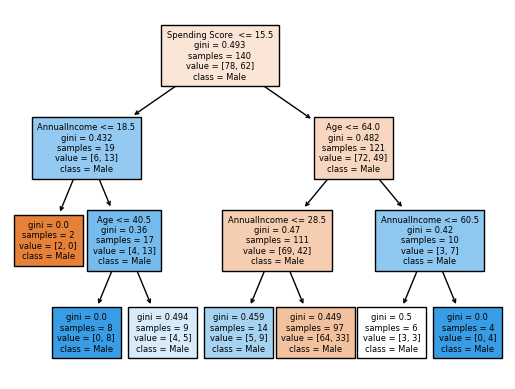

In [56]:
tree.plot_tree(arbol_SpendingScore, feature_names=list(x.columns.values),
               class_names=list(y.values), filled=True, fontsize=6 )
plt.show()

In [57]:
fig.savefig('arbol de desiciones.png')

In [29]:
y_pred = arbol_SpendingScore.predict(x_test)

y_pred

array(['Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Female'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
matriz_de_confusion = confusion_matrix(y_test, y_pred)

In [32]:
matriz_de_confusion

array([[27,  7],
       [19,  7]], dtype=int64)

In [33]:
import numpy as np

In [34]:
precision_global = np.sum(matriz_de_confusion.diagonal())/ np.sum(matriz_de_confusion)

In [35]:
precision_global

0.5666666666666667

In [38]:
precision_female = ((matriz_de_confusion[0,0]))/sum(matriz_de_confusion[0,])

In [39]:
precision_female

0.7941176470588235

In [40]:
precision_male = ((matriz_de_confusion[1,1]))/sum(matriz_de_confusion[1,])

In [41]:
precision_male

0.2692307692307692